<img src="TechLabs.png">

<h2>Please enter your full name here:</h2>


<p> This exam will test your knowledge in Artificial Intelligence. </p>
<p> We will test the following: </p>

- Logistic Regressions
- Neural Networks
- Monte Carlo Simulation

# Question 1:
Below is the code to import a standard dataset with breast cancer.
When you run the cell, you will have it stored as the object "data",
and the description of the dataset is printed out for you.

### Your task is to create two models for classifying the diagnosis, and compare the accuracy metrics for the two:
### 1. a) Logistic Regression: 
"sklearn.linear_model" offers good logit classifiers. Because the dataset is fairly small (~500 rows), we suggest that you use the "liblinear" solver for fitting the logit classifier.

Split the dataset into a test and training (30% test / 70% training) dataset and train the model on the training dataset. Then, classify the test dataset, and compute the accuracy, which you can print as an output.

P.S.: We do not expect you to regularize for type 1 or type 2 errors. Your goal is to build models that classify well the diagnosis. Also, we do not expect you to spend hours on feature engineering and/or other things that may or may not improve testing accuracy. A good answer shall just contain a sensible model and the testing accuracy.

In [65]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

def metrics_(conf_matrix):
  try: 
    TN = conf_matrix.confusion_matrix[0][0]
  except:
    TN = conf_matrix[0][0]
  try: 
    FN = conf_matrix.confusion_matrix[0][1]
  except:
    FN = conf_matrix[0][1]
  try:
    FP = conf_matrix.confusion_matrix[1][0]
  except:
    FP = conf_matrix[1][0]
  try:
    TP = conf_matrix.confusion_matrix[1][1]
  except:
    TP = conf_matrix[1][1]
  Accuracy = round((TN+TP) / (TN+FN+FP+TP),3)
  Recall_1 = round(TP / (TP+FN),3)
  Precision_1 = round(TP/(TP+FP),3)
  return print("True Negative:", TN , "\nFalse Negative:", FN , "\nFalse positive:", FP , "\nTrue Positive:", TP, "\nAccuracy:", Accuracy, "\nRecall class 1:", Recall_1, "\nPrecision class 1:", Precision_1, "\n")


In [66]:
data = datasets.load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

First let's divide the dataset into 3 different variables: <br>
__variable_data__ -> array with all the features values <br>
__column_data__ -> array with all the feature columns names <br> 
__outcome_data__ -> array with all the target values <br>

In [67]:
variable_data = data.data
column_data = data.feature_names
outcome_data = data.target

Let's inspect the data

In [68]:
df = pd.DataFrame(variable_data,columns=column_data)
df['outcome'] = outcome_data

Humm, we can observe that the multiple variables have different ranges, we will need to normalize them so that Logistic Regression is not influenced by the scale

In [69]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
outcome                    0
dtype: int64

Perfect, the dataset does not have missing! <br>
In order to perform the normalization correctly we need to make sure that the test dataset is completely new, and as such we need to perform the normalization on the training dataset and apply that method afterwards to the test dataset. <br>

So let's first divide the dataset into training and test by using test_size = 0.3. TO be able to reproduce the results I am using the seed '123'

In [70]:
x_train , x_test, y_train , y_test = train_test_split(variable_data, outcome_data, test_size = 0.3, random_state=123)

In [71]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

After having the dataset scaled, let's perform our first model, I have tried with max_iter = 10,20,30 and there was an alert that the results did not converge, as such I increased by another 10, and now it presents stable results

True Negative: 144 
False Negative: 0 
False positive: 0 
True Positive: 254 
Accuracy: 1.0 
Recall class 1: 1.0 
Precision class 1: 1.0 



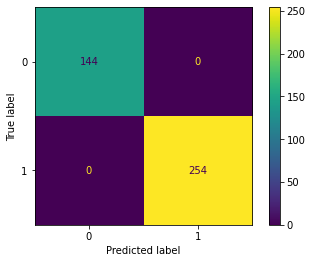

In [72]:
log_1 = LogisticRegression(random_state=0, C=1e9, max_iter=40)
model  = log_1.fit(x_train_scaled, y_train)
model.score(x_train_scaled, y_train)
ax1 = plot_confusion_matrix(log_1, x_train_scaled, y_train, values_format='.0f') 
metrics_(ax1)

With this model we obtain 100% Accuracy, Recall and  Precision. It sounds promising.
<br>
<br>
Let's then test it on our test dataset!

True Negative: 66 
False Negative: 2 
False positive: 0 
True Positive: 103 
Accuracy: 0.988 
Recall class 1: 0.981 
Precision class 1: 1.0 



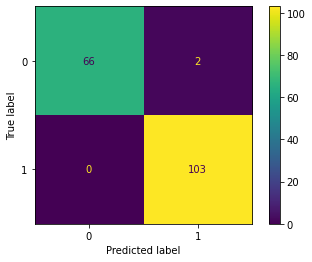

In [73]:
model.score(x_test_scaled, y_test)
ax2 = plot_confusion_matrix(log_1, x_test_scaled, y_test,values_format='.0f') 
metrics_(ax2)

We can observe that the model fails to categorize properly two situations. <br>
We predicted that there was cancer in a situation without cancer. <br>
<br> The impact can be dubious. For instance if the implications of having cancer implies that an aggressive treatment needs to be taken and as such it can put the person life at risk, then we can understand that we do need to fine-tune the model. However, I believe it is not as bad as the opposite, meaning that I prefer to be conservative and say that we have more cancer situations than failing to correctly predict a cancer situation. <br>

Just so we understand the factors that influence the outcome, let's plot the feature importance.

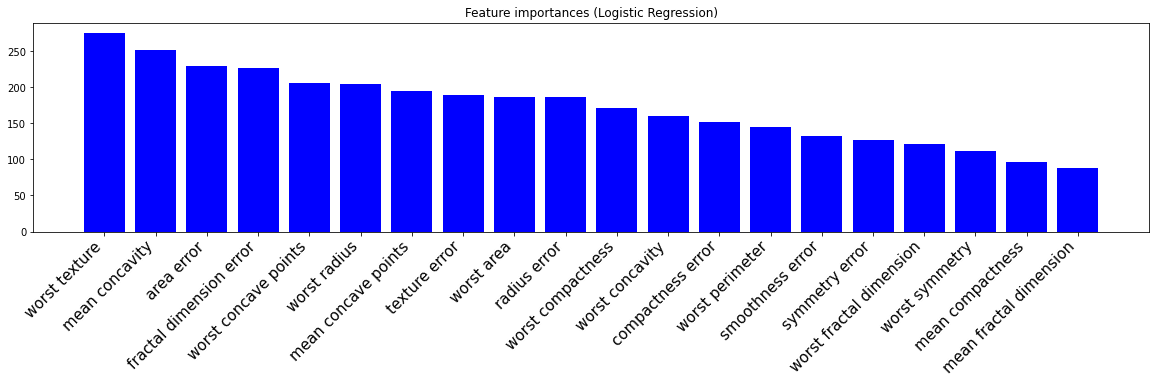

In [74]:
coefs = np.abs(log_1.coef_[0])
indices = np.argsort(coefs)[::-1]
plt.figure(figsize=(20,5))
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(20), coefs[indices[:20]],
       color="b", align="center")
plt.xticks(range(20), data.feature_names[indices[:20]], rotation=45, ha='right',size=15)
plt.subplots_adjust(bottom=0.3)

# Print the logit accuracy below:

In [75]:
logitacc = round(model.score(x_test_scaled, y_test),3)
print(f"\ntesting set accuracy with logit is: {logitacc}")


testing set accuracy with logit is: 0.988


### 1. b) Feedforward Neural Network:
So far, so good. Let's see how a feedforward neural network does for the same task.

Take the same train/test split as in a), and construct the following neural network, which you fit to the data:

In [76]:
from keras.models import Sequential
from keras.layers import Dense

In [77]:
import pickle
pickle.loads(b'\x80\x03]q\x00(X\x15\x00\x00\x00Model: "sequential_2"q\x01XA\x00\x00\x00_________________________________________________________________q\x02XA\x00\x00\x00Layer (type)                 Output Shape              Param #   q\x03XA\x00\x00\x00=================================================================q\x04XA\x00\x00\x00dense_5 (Dense)              (None, 30)                930       q\x05XA\x00\x00\x00_________________________________________________________________q\x06XA\x00\x00\x00dense_6 (Dense)              (None, 50)                1550      q\x07XA\x00\x00\x00_________________________________________________________________q\x08XA\x00\x00\x00dense_7 (Dense)              (None, 30)                1530      q\tXA\x00\x00\x00_________________________________________________________________q\nXA\x00\x00\x00dense_8 (Dense)              (None, 1)                 31        q\x0bXA\x00\x00\x00=================================================================q\x0cX\x13\x00\x00\x00Total params: 4,041q\rX\x17\x00\x00\x00Trainable params: 4,041q\x0eX\x17\x00\x00\x00Non-trainable params: 0q\x0fXA\x00\x00\x00_________________________________________________________________q\x10e.')

['Model: "sequential_2"',
 '_________________________________________________________________',
 'Layer (type)                 Output Shape              Param #   ',
 '=================================================================',
 'dense_5 (Dense)              (None, 30)                930       ',
 '_________________________________________________________________',
 'dense_6 (Dense)              (None, 50)                1550      ',
 '_________________________________________________________________',
 'dense_7 (Dense)              (None, 30)                1530      ',
 '_________________________________________________________________',
 'dense_8 (Dense)              (None, 1)                 31        ',
 '=================================================================',
 'Total params: 4,041',
 'Trainable params: 4,041',
 'Non-trainable params: 0',
 '_________________________________________________________________']

### You can use the library keras to contruct the ANN. Since we are dealing with a classification problem, we recommend binary_crossentropy as a loss function.
Choose a reasonable batch size and epoch count and train the model.
### Here again, print the testing dataset accuracy:

I will try 4 different activation functions: <br>
__Sigmoid__ -> that is specially good at binary classication <br>
__Tanh__ -> which is good for classification problems, specially when values are both negative and positive, like this case <br>
__Softmax__ -> It is better for multi-class classification problems<br>
__3x relu + sigmoid__ -> because relu tries to identify linear relationships between variables and then combines it and sigmoid to perform better the classification

I am expecting that Sigmoid, Tanh and 3x relu + sigmoid will perform better then Softmax.
I tried several optimizers, such as: SGD, Adadelta, Adamax and Adam and 10,20,30 as batch size. I expected that Adam would perform better and that were results. And the lower the batch size number the better, this because our dataset is pretty small.

__Sigmoid__

In [78]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1_results = model.fit(x_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 0.6573 - accuracy: 0.6309
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.6454
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6542
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5934 - accuracy: 0.6661
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.6405
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8569
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.8888
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8953
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8905
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.9149
Epoch 11/

__Tanh__

In [79]:
model2 = Sequential()
model2.add(Dense(30, input_dim=30, activation='tanh'))
model2.add(Dense(50, activation='tanh'))
model2.add(Dense(30, activation='tanh'))
model2.add(Dense(1, activation='tanh'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_results = model2.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 9.7200 - accuracy: 0.3700
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 9.6158 - accuracy: 0.3766
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 10.1281 - accuracy: 0.3434
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 10.1448 - accuracy: 0.3423
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 10.4792 - accuracy: 0.3206
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 9.8689 - accuracy: 0.3602
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 9.7717 - accuracy: 0.3665
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 10.5082 - accuracy: 0.3188
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 9.6368 - accuracy: 0.3752
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 9.8346 - accuracy: 0.3624
Epoch

__Softmax__

In [80]:
model3 = Sequential()
model3.add(Dense(30, input_dim=30, activation='softmax'))
model3.add(Dense(50, activation='softmax'))
model3.add(Dense(30, activation='softmax'))
model3.add(Dense(1, activation='softmax'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3_results = model3.fit(x_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 0.6806 - accuracy: 0.6236
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6120
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6820
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6416
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6652
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6408
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6449
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6283
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6234
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6506
Epoch 11/

__Sigmoid__

In [81]:
model4 = Sequential()
model4.add(Dense(30, input_dim=30, activation='sigmoid'))
model4.add(Dense(50, activation='sigmoid'))
model4.add(Dense(30, activation='sigmoid'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model4_results = model4.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
40/40 [==============================] - 1s 1ms/step - loss: 0.6507 - accuracy: 0.6454
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6063
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.6226
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6455 - accuracy: 0.6551
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.6559
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.6618
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.6860
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.6024
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.6630
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.6796
Epoch 11/

__3x Relu + Sigmoid__

In [82]:
model5 = Sequential()
model5.add(Dense(30, input_dim=30, activation='relu'))
model5.add(Dense(50, activation='relu'))
model5.add(Dense(30, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model5_results = model5.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 7.2386 - accuracy: 0.5618
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8865
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8876
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8646
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 1.0279 - accuracy: 0.7776
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7810 - accuracy: 0.8485
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.9161
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.9104
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.8818
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8805
Epoch 11/

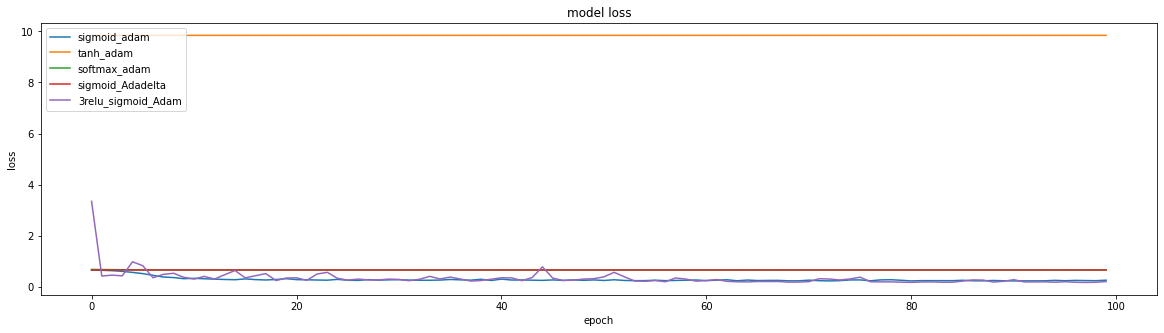

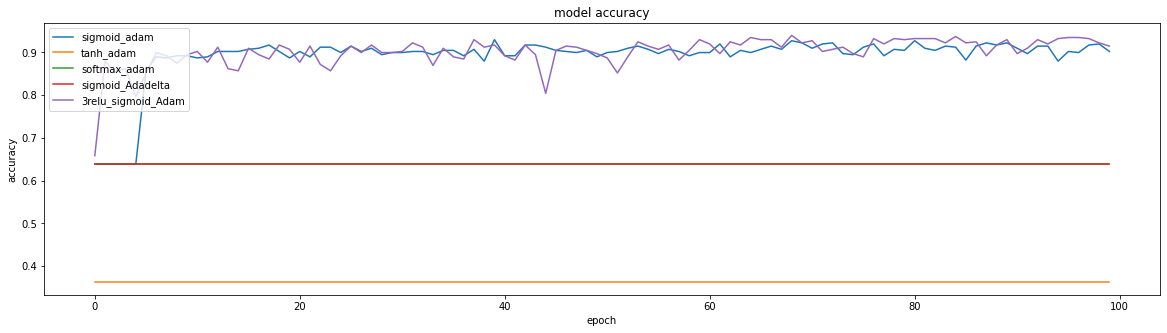

In [83]:
plt.figure(figsize=(20,5))
plt.plot(model_1_results.history['loss'])
plt.plot(model2_results.history['loss'])
plt.plot(model3_results.history['loss'])
plt.plot(model4_results.history['loss'])
plt.plot(model5_results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sigmoid_adam','tanh_adam', 'softmax_adam','sigmoid_Adadelta','3relu_sigmoid_Adam'], loc='upper left')
plt.show()
plt.figure(figsize=(20,5))
plt.plot(model_1_results.history['accuracy'])
plt.plot(model2_results.history['accuracy'])
plt.plot(model3_results.history['accuracy'])
plt.plot(model4_results.history['accuracy'])
plt.plot(model5_results.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['sigmoid_adam','tanh_adam', 'softmax_adam','sigmoid_Adadelta','3relu_sigmoid_Adam'], loc='upper left')
plt.show()

In [84]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model2.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model3.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model4.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model5.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9298
Accuracy: 92.98
6/6 [==============================] - 0s 2ms/step - loss: 9.2911 - accuracy: 0.3977
Accuracy: 39.77
6/6 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.6023
Accuracy: 60.23
6/6 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6023
Accuracy: 60.23
6/6 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9357
Accuracy: 93.57


In [91]:

model1_predicted = model.predict_classes(x_test)
model2_predicted = model2.predict_classes(x_test)
model3_predicted = model3.predict_classes(x_test)
model4_predicted = model4.predict_classes(x_test)
model5_predicted = model5.predict_classes(x_test)


print("For model 1, sigmoid_adam:")
confusion_matrix_1 = metrics.confusion_matrix(y_true=y_test, y_pred=model1_predicted)
metrics_(confusion_matrix_1)
print("For model 2, tanh_adam:")
confusion_matrix_2 = metrics.confusion_matrix(y_true=y_test, y_pred=model2_predicted)
metrics_(confusion_matrix_2)
print("For model 3, softmax_adam:")
confusion_matrix_3 = metrics.confusion_matrix(y_true=y_test, y_pred=model3_predicted)
metrics_(confusion_matrix_3)
print("For model 4, sigmoid_Adadelta:")
confusion_matrix_4 = metrics.confusion_matrix(y_true=y_test, y_pred=model4_predicted)
metrics_(confusion_matrix_4)
print("For model 5, 3xrelu + sigmoid_adam:")
confusion_matrix_5 = metrics.confusion_matrix(y_true=y_test, y_pred=model5_predicted)
metrics_(confusion_matrix_5)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


For model 1, sigmoid_adam:
True Negative: 60 
False Negative: 8 
False positive: 4 
True Positive: 99 
Accuracy: 0.93 
Recall class 1: 0.925 
Precision class 1: 0.961 

For model 2, tanh_adam:
True Negative: 68 
False Negative: 0 
False positive: 103 
True Positive: 0 
Accuracy: 0.398 
Recall class 1: nan 
Precision class 1: 0.0 

For model 3, softmax_adam:
True Negative: 0 
False Negative: 68 
False positive: 0 
True Positive: 103 
Accuracy: 0.602 
Recall class 1: 0.602 
Precision class 1: 1.0 

For model 4, sigmoid_Adadelta:
True Negative: 0 
False Negative: 68 
False positive: 0 
True Positive: 103 
Accuracy: 0.602 
Recall class 1: 0.602 
Precision class 1: 1.0 

For model 5, 3xrelu + sigmoid_adam:
True Negative: 57 
False Negative: 11 
False positive: 0 
True Positive: 103 
Accuracy: 0.936 
Recall class 1: 0.904 
Precision class 1: 1.0 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in long_scalars


In [94]:
model5.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9357


[0.17287413775920868, 0.9356725215911865]

In [95]:
ANNacc = model5.evaluate(x_test, y_test)[1]
print(f"\ntesting set accuracy with ANN is: {ANNacc}")

6/6 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9357

testing set accuracy with ANN is: 0.9356725215911865


### 1. c) Compare the performance of the neural net with the logit. Which one seems better at the job and why might that be?
Please also comment on which model you would choose to implement in a case like this and why.

We observe that the logistic regression performs better than the ANN. 
Logistict regression obtained an Accuracy of 0.988, while ANN obtained a lower performance. This can be attributed to the dataset size. Neural networks performs best with large datasets, just to compare we have less than 600 records and our reasonable simple Neural Network alone has 4.041 parameters. <br>
<br>We observe during the training process that the loss does not decrease in the end, alerting us for the fact that it might be overfitting, or that in fact it can no longer learn anymore.<br>

If I had to implement one of the models I would implement the logistic regression for multiple reasons:<br><br>

__1)__ Easier to implement <br>
__2)__ Easier model maintenance<br>
__3)__ Consistency of results (we will obtain a different model everytime we run ANN) <br>
__4)__ In case we need interpretability to justify the importance or the weights to the features, logistic regression is more trustworthy and provides better compliance.<br>

# Question 2:
### Your coding skills have gained you a job as an options trader at a successful hedge fund! Congratulations!!

At the first day, your boss comes to you and asks you, whether he should buy a _call option_* with a certain set of characteristics for 1€.

    *A call option gives you the right (but not obligation) to buy a share for a certain strike price. In other words, if the stock price is higher than the strike price, you get the difference, otherwise, you get 0: 
    
    callpayoff = max(stockprice - strikeprice, 0) 

To price the option, you shall build a monte-carlo simulator which generatates _1 000 000_ random walks, each representing the stock price in one year, which is when the option can be expired. By taking the average of these payouts, you will get the expected payout at expiry!

Luckily, your boss has also given you the characteristics and hints for how the stock price moves: 

The stock price follows a student T distribution with 3 degrees of freedom (the rvs function within the t class from scipy.stats package is a great tool for creating random walks with this distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html  ctrl+f "rvs") 

- The stock price today: 69
- Stock returns follow student T distribution with 3 degrees of freedom
- drift of 10% per year 
- volatility of 20%
- strike price of the option is 96

### Build a function that returns the price of the call option, and shows your boss what payout he can expect from the option in order to explain him, whether he should buy it or not.

    P.S.: If you run into trouble on your way, you can always ask for tips from your boss and since he is a nice guy, he will also give a good grade for all attempts!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from  scipy.stats import t
from random import random
from random import seed
import matplotlib.pyplot as plt

initial_value = 69
std_dev = 0.20
strike = 96
drift = 0.10

According to the information provided, I can understand that: <br>
__Drift__ — the direction that rates of returns have had in the past. That is, the expected return of the stock. <br>
__Volatility__ — the historical volatility multiplied by a random, standard normal variable. This is our standard deviation.
<br>

As such, the value of the stock will be the current value of the stock multiplied by the expected drift and its volatility.

Since we care about the future value in one year, I performed the prediction of the stock by day, therefore 252 subsequent predictions and I performed 1M simulations. I used 252 as it is the number of days that the stock market is opened.

In [ ]:
drift_movement= [drift]
profit = [max(initial_value - strike, 0) ]
steps = 252 
numwalks = 1000000

def makewalk(steps):
  initial_value = 69
  random_walk = [initial_value]
  for i in range(1,steps):
    movement = t.rvs(df = 3, scale = initial_value * drift/252 + initial_value*std_dev, size=1)
    value = random_walk[i-1] + movement
    random_walk.append(value)
    drift_movement.append(drift - value/(initial_value/drift))
    callpayoff = max(value - strike, 0) 
    profit.append(callpayoff)
  random_walk=np.asarray(random_walk)
  return random_walk

walks = [makewalk(steps) for i in range(numwalks)]
average_walks = np.sum(walks, 0)*1.0/numwalks

average_walks[-1]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Just so we can visualize some of the simulations, I am plotting the stock price for 6 of the simulations out of the 1 million performed and I am plotting the average price for the stock too in __black__.

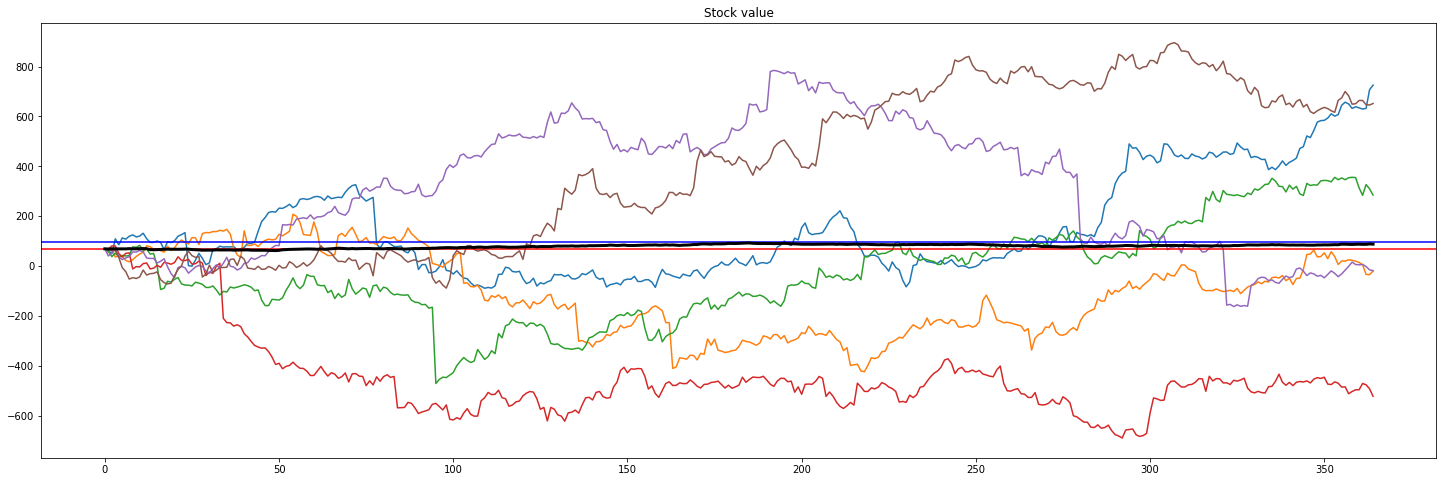

In [23]:
plt.figure(figsize=(25,8))
plt.plot(walks[0])
plt.plot(walks[1])
plt.plot(walks[2])
plt.plot(walks[3])
plt.plot(walks[4])
plt.plot(walks[5])
plt.axhline(y=initial_value, color='r', linestyle='-')
plt.axhline(y=96, color='b', linestyle='-')
plt.plot(average_walks, linestyle='-',linewidth=3, markersize=10, color = 'black')
plt.title("Stock value")
plt.show()

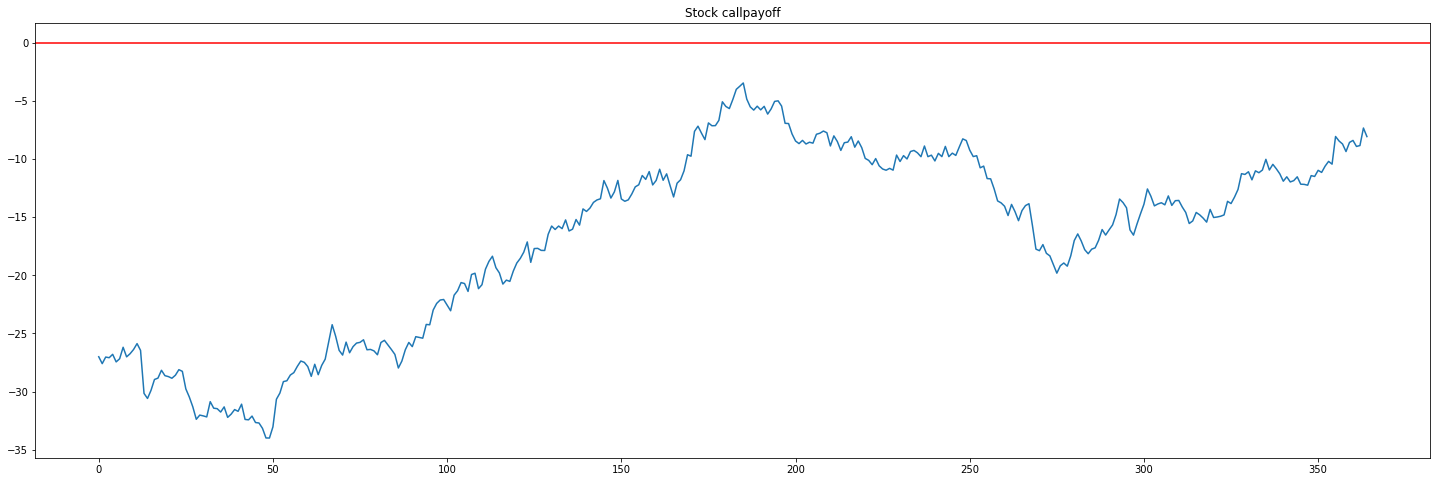

In [24]:
profit = average_walks-strike
plt.figure(figsize=(25,8))
plt.plot(profit)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Stock callpayoff")
plt.show()

In the first graph if the average price (black line) is above the strike price (red line) means that we should buy the option. <br>
Similarly, in the second graph if the call stockoff is above the red line we should buy the option.

In [25]:
if round(profit[-1][0],2) >0:
  print('The final calloff is:', round(profit[-1][0],2),', the company should buy the option')
else:
  print('The final calloff is:', round(profit[-1][0],2),', the company should not buy the option')

The final calloff is: -8.07 , the company should not buy the option


# Good luck!

Don't forget: google, github and stack overflow are your best friends!
